In [1]:
import sys
import os


# auto-reload library if developing library functionalities
%reload_ext autoreload
%autoreload 2
# Add the old-can-decoder-c56d4fe6 directory to sys.path
sys.path.append(os.path.abspath('old-can-decoder-c56d4fe6'))

# import library
from PandaCANDecoder.decoder import Decoder as OldDecoder
from can_decoder.decoder import Decoder

In [2]:
decoder = Decoder("./data/SampleRoadAcceleration_v2.csv")

# Generate message objects

byte_filters = {
    "18DA10F1": ["1", "2", "3", "4",'5'],
    "18DAF110": ["1", "2", "3", "4",'5'],
    "18DAF218": ["1", "2", "3", "4",'5'],
    "18DA18F2": ["1", "2", "3", "4",'5'],
}

decoder.generate_msgs(byte_filters=byte_filters)


Generated 910 messages


In [3]:
## Dynamic filtering: if byte 1 is 0 we should discard byte 5
for msg in decoder.msgs:
    if msg.msg_byte_filter is not None:
        if msg.msg_byte_filter['1'] != 0:
            msg.msg_byte_filter.pop('5', None)
            # Remove duplicates

# Remove duplicate messages with same msg_id and identical msg_byte_filter after discarding byte 5
unique_msgs = []
seen = set()
for msg in decoder.msgs:
    key = (msg.msg_id, tuple(sorted(msg.msg_byte_filter.items())) if msg.msg_byte_filter else None)
    if key not in seen:
        unique_msgs.append(msg)
        seen.add(key)
decoder.msgs = unique_msgs

In [4]:
# Generate message time series data

decoder.generate_msg_ts_data(rewrite=True)  

In [66]:
decoder.calculate_signals(
        tokenization_method='conditional_bit_flip',
        signedness_method='msb_classifier',
        alpha1=0.01,
        alpha2=0.5, #0.5,
        gamma1=0.2)

In [6]:
decoder.get_message('18DA10F1',[0x3,0x22,1,201])

Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:201] : Length 8 bytes

In [36]:
decoder.msgs

[Message 42A: Length 32 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:201] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:209] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:213] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:178] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:179] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:180] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:181] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:3|B4:225] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:3|B4:240] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:29] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:32] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:35] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:39] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:18|B4:201] : Length 8

In [48]:
decoder.get_message('42A').signals

[Message: 42A, Signal: SIG_BE_0, Type: constant , Signed: signed,
 Message: 42A, Signal: SIG_BE_1, Type: ts , Signed: signed,
 Message: 42A, Signal: SIG_BE_2, Type: constant , Signed: signed,
 Message: 42A, Signal: SIG_BE_3, Type: ts , Signed: unsigned,
 Message: 42A, Signal: SIG_BE_4, Type: constant , Signed: signed,
 Message: 42A, Signal: SIG_BE_5, Type: ts , Signed: signed,
 Message: 42A, Signal: SIG_BE_6, Type: ts , Signed: signed,
 Message: 42A, Signal: SIG_BE_7, Type: constant , Signed: signed,
 Message: 42A, Signal: SIG_LE_0, Type: constant , Signed: signed,
 Message: 42A, Signal: SIG_LE_1, Type: ts , Signed: unsigned,
 Message: 42A, Signal: SIG_LE_2, Type: ts , Signed: unsigned,
 Message: 42A, Signal: SIG_LE_3, Type: constant , Signed: signed,
 Message: 42A, Signal: SIG_LE_4, Type: ts , Signed: unsigned,
 Message: 42A, Signal: SIG_LE_5, Type: constant , Signed: signed,
 Message: 42A, Signal: SIG_LE_6, Type: ts , Signed: unsigned,
 Message: 42A, Signal: SIG_LE_7, Type: constant 

In [38]:
decoder.plot_message_from_id('42A')

In [65]:
decoder.plot_signal_from_id('42A', signal_id='SIG_BE_8')

Signal SIG_BE_8 in message 42A not found.


In [18]:
s1 = decoder.get_signal('10F',signal_id='SIG_BE_51')
s2 = decoder.get_signal('18DAF218',[0,12,98,5,31], 'SIG_BE_1')

In [47]:
s2

Message: 18DAF218, Signal: SIG_BE_1, Type: ts , Signed: unsigned

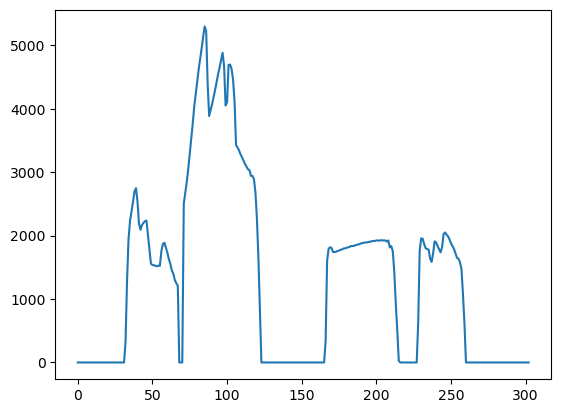

In [23]:
import matplotlib.pyplot as plt

plt.plot(s2.ts_data_raw)

In [12]:
decoder.plot_message_from_id('18DAF218',[0,12,98,5,31])

In [13]:
f = decoder.plot_signal_from_id('18DAF218',[0,12,98,5,31], 'SIG_BE_1', return_fig=True)
f['data'][0]['mode'] = 'lines+markers'
f.show()

In [32]:
decoder.plot_message_from_id('18DAF218',[0,24,98,80,33])

In [33]:
f = decoder.plot_signal_from_id('18DAF218',[0,24,98,80,33], 'SIG_BE_13', return_fig=True)
f['data'][0]['mode'] = 'lines+markers'
f.show()

In [54]:
decoder.get_signal('18DAF218',[0,12,98,5,31], 'SIG_BE_1')

Message: 18DAF218, Signal: SIG_BE_1, Type: ts , Signed: unsigned

In [29]:
decoder.msgs

[Message 42A: Length 32 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:201] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:209] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:213] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:178] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:179] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:180] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:2|B4:181] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:3|B4:225] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:3|B4:240] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:29] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:32] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:35] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:39] : Length 8 bytes,
 Message 18DA10F1 - Filter [B1:3|B2:34|B3:18|B4:201] : Length 8

In [14]:
s = decoder.get_signal('18DAF218',[0,12,98,5,31], 'SIG_BE_1')

In [15]:
signal = decoder.get_signal('18DAF218',[0,12,98,5,31], 'SIG_BE_1')

In [17]:
signal.ts_data_timestamps

0       0.658172
1       0.897859
2       1.188115
3       1.418120
4       1.657917
         ...    
298    88.454479
299    88.674494
300    88.914513
301    89.174534
302    89.424553
Name: abs_time, Length: 303, dtype: float64